# Notebook for OpenAIJsonConfig
## Update system path

In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

## Import dependency

In [2]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.client import Client
from uniflow.flow.flow_factory import FlowFactory
from uniflow.model.model import ModelServerFactory
from uniflow.config import OpenAIConfig
from uniflow.model.config import OpenAIModelConfig
from uniflow.viz import Viz
from uniflow.schema import GuidedPrompt, Context

load_dotenv()

/Users/joseortiz/anaconda3/envs/uniflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [3]:
FlowFactory.list()

['LinearFlow',
 'ModelFlow',
 'JsonModelFlow',
 'OpenAIModelFlow',
 'OpenAIJsonModelFlow',
 'HuggingFaceModelFlow',
 'LMQGModelFlow']

In [4]:
ModelServerFactory.list()

['OpenAIModelServer', 'HuggingfaceModelServer', 'LMQGModelServer']

## Run model flow to generate data

In [5]:
contexts = [
    "It was a sunny day and the sky color is blue.",
    "My name is bobby and I am a talent software engineer working on AI/ML.",
]

guided_prompt = GuidedPrompt(
    instruction="Generate one question and its corresponding answer based on the context. Follow the format of the examples below to include context, question, and answer in the response in json"
)

data = [Context(context=c) for c in contexts]

In [6]:
config = OpenAIConfig(
    guided_prompt_template=guided_prompt,
    model_config=OpenAIModelConfig(
        response_format={"type": "json_object"}
    ),
)
client = Client(config)

In [7]:
output = client.run(data)
output

100%|██████████| 2/2 [00:01<00:00,  1.48it/s]


[{'output': [{'response': [{'context': 'It was a sunny day and the sky color is blue.',
      'question': 'What was the color of the sky?',
      'answer': 'blue.'}],
    'error': 'No errors.'}],
  'root': <uniflow.node.node.Node at 0x10a044970>},
 {'output': [{'response': [{'context': 'My name is bobby and I am a talented software engineer working on AI/ML.',
      'question': "What is bobby's profession?",
      'answer': 'software engineer.'}],
    'error': 'No errors.'}],
  'root': <uniflow.node.node.Node at 0x10a0447f0>}]

In [8]:
output[0]['output'][0]

{'response': [{'context': 'It was a sunny day and the sky color is blue.',
   'question': 'What was the color of the sky?',
   'answer': 'blue.'}],
 'error': 'No errors.'}

## Plot model flow graph

In [9]:
graph = Viz.to_digraph(output[0]['root'])

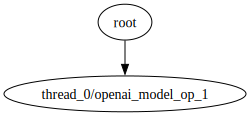

In [10]:
display(graph)

In [11]:
graph = Viz.to_digraph(output[1]['root'])

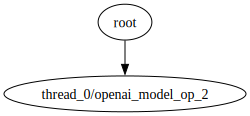

In [12]:
display(graph)